In [3]:
import sys
import numpy as np
import datetime
%pylab inline
from os import listdir, path, chdir

Populating the interactive namespace from numpy and matplotlib


In [2]:
target_folder = datetime.datetime.now().strftime("%m-%d-%Y")
data_folder = "/home/photon/data/"+target_folder
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

OSError: [Errno 2] No such file or directory: '/home/photon/data/07-10-2017'

In [4]:
#Use this to pull from a different day:
data_folder = "/home/photon/data/06-22-2017"
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

In [5]:
allFiles = listdir(data_folder)
allFiles.sort()
allFiles

['11-33-57_raw.npz',
 '11-38-34_raw.npz',
 '11-42-11_raw.npz',
 '11-46-21_raw.npz',
 '11-49-52_raw.npz',
 '11-57-03_raw.npz',
 '12-01-31_raw.npz',
 '13-40-42_raw.npz',
 '13-50-22_raw.npz',
 '13-56-00_raw.npz',
 '14-03-39_raw.npz',
 '14-11-47_raw.npz',
 '14-14-03_raw.npz',
 '14-19-21_raw.npz',
 '14-27-49_raw.npz',
 '14-32-42_raw.npz',
 '14-43-41_raw.npz',
 '14-49-19_raw.npz',
 '14-55-23_raw.npz']

In [6]:
#Import last file in folder (by default)
data_npz = np.load(allFiles[-1])
VacCorrected = data_npz['VacCorrected']
ncount = data_npz['ncount']

In [7]:
n = np.sqrt(ncount)
print "Std dev. of LO: ", n.std()/n.mean()
print "Peak to Peak as fraction of LO mean: ", (n.max()-n.min())  / n.mean()

Std dev. of LO:  0.0527356219935
Peak to Peak as fraction of LO mean:  0.192159063752


In [8]:
scaled_vc = np.sqrt(2.0/ncount)*VacCorrected

In [9]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(300)]

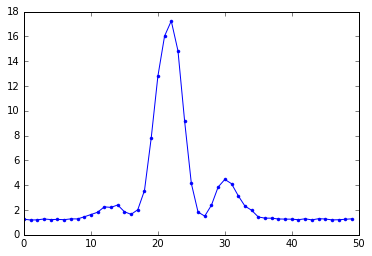

In [10]:
plot(avg_n_quick[200:250],".-")  # look at the modes with their amplitudes

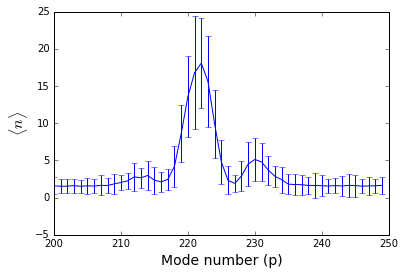

In [11]:
start = 200
stop = 250
std_dev_n = np.zeros(300)
avg_n = np.zeros(300)
for i in range(start,stop):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    std_dev_n[i] = Q.std_n_raw(x,y)
    avg_n[i] = Q.avg_n_raw(x,y)

errorbar(arange(start,stop,1),avg_n[start:stop],yerr=std_dev_n[start:stop])
xlabel("Mode number (p)",size=14)
ylabel("$\\langle n \\rangle$",size=16)

In [33]:
mode = 214
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = (np.abs(scaled_vc[mode,:,:]).std(axis=0))**2

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

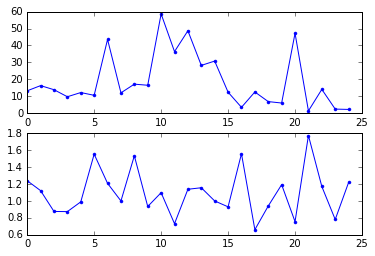

In [34]:
subplot(211)
plot(check_n,".-")
#ylim(ymin=0)
subplot(212)
plot(check_var,".-")
#ylim(ymin=0)

Now pick the slice of rounds to analyze

In [35]:
output = scaled_vc[mode,:,:].flatten('F')

In [36]:
x = np.real(output)
y = np.imag(output)

Average amplitude: 5.815456


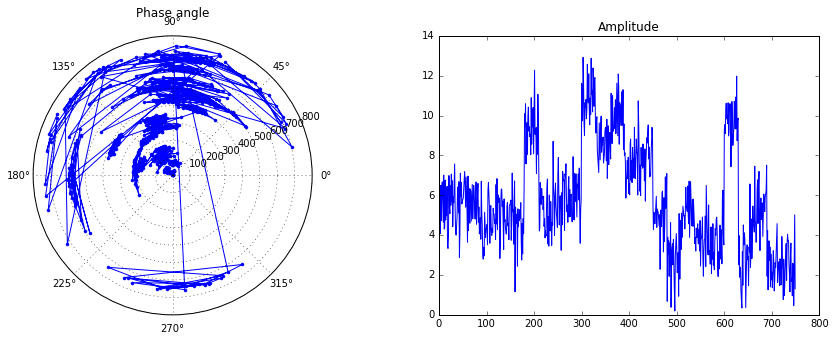

In [37]:
# Look at the average amplitude and a plot of phase angle and amplitude vs. shot number:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121, polar=True)
plt.plot(angle(output),np.arange(len(output)),".-")
plt.title("Phase angle")
plt.subplot(122)
#plt.ylim(0,20)
plt.plot(abs(output))
plt.title("Amplitude")
print "Average amplitude: %f" % np.average(abs(output))

In [38]:
0.5*(np.abs(output).mean())**2  # the easy calculation

16.909762038023157

In [39]:
n = Q.avg_n_raw(x,y)  # the estimated photon number from x and y
n

20.299471536766365

In [40]:
X,Y,Z = Q.kernel_estimate(x,y)

('KDE kernel factor: ', 0.33175931280044108)


In [41]:
print "<n_Q> = ",Q.avg_n(X,Y,Z)  # the calculated from Q function
print "<n_Q-raw> = ", Q.avg_n_raw(x,y)
print "StDev n = ", Q.std_n(X,Y,Z)
print "StDev n raw = ", Q.std_n_raw(x,y)

<n_Q> =  237.546946134
<n_Q-raw> =  20.2994715368
StDev n =  nan
StDev n raw =  17.1502272649


In [42]:
print "Kernel estimate noise as percent: %0.2f" % ((Q.std_n(X,Y,Z) / sqrt(Q.avg_n(X,Y,Z)) - 1)*100)
print "Raw quadratures noise as percent: %0.2f" % ((Q.std_n_raw(x,y) / sqrt(Q.avg_n_raw(x,y)) - 1)*100)

Kernel estimate noise as percent: nan
Raw quadratures noise as percent: 280.65


('KDE kernel factor: ', 0.33175931280044108)


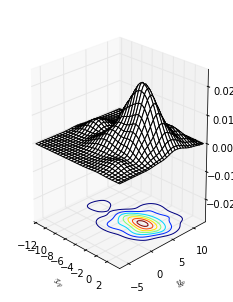

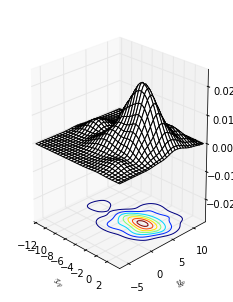

In [43]:
Q.qsurf(x,y)  # good looking figures though!

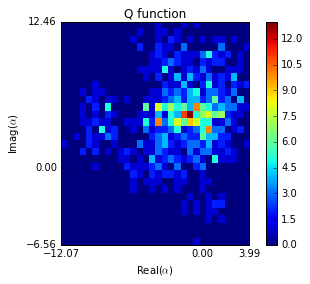

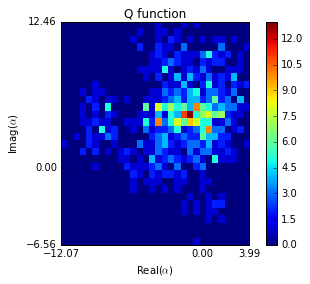

In [44]:
Q.qfuncimage(output)